## Импорт библиотек и первого датасета

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
import matplotlib.patches as patches

In [ ]:
df_diabetes = pd.read_csv('diabetes.csv')

In [ ]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Предварительный анализ данных

In [ ]:
print(f'Количество наблюдений: {df_diabetes.shape[0]}')
print(f'Количество колонок: {df_diabetes.shape[1]}')

Количество наблюдений: 768
Количество колонок: 9


Датасет содержит 768 наблюдений по пациенткам в возрасте старше 21 года, родом из племени пима. Все наблюдения распределены по 9 критериям (колонкам):


1.   **Pregnancies** – число беременностей
2.   **Glucose** – концентрация глюкозы в плазме через 2 часа после введения в пероральном глюкозотолерантном тесте (мг/дл)
3.   **BloodPressure** – диастольческое (нижнее) кровяное давление (мм рт. ст.)
4.   **SkinThickness** – толщина кожной складки в области трицепса (мм)
5.   **Insulin** – концентрация инсулина в сывортке крови при 2-часовом воздержании от еды (мкЕд/мл)
6.   **BMI** – индекс массы тела ((вес, кг / рост, м)^2)
7.   **DiabetesPedigreeFunction** – наследственность (генетическая предрасположенность к диабету)
8.   **Age** – возраст (число лет)
9.   **Outcome** – выход: 0 – если нет диабета, 1 – в противном случае



Перед проведением анализа также важно проверить, что в данных отсутствуют пустые значения, так как они могут повлиять на итоговые рассчеты

In [ ]:
#Смотрим на количество пропущенных значений в данных
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Пустых значений в данных нет, но присутствуют 0 показатели в категориях глюкозы, артериального давления, толщины кожной складки и индекса массы тела. Такие данные некорректны, так что их следует заменить на средние или медианные значения в категории

In [ ]:
#Заменяем нулевые данные на среднее и медиану
df_diabetes['Glucose'] = df_diabetes['Glucose'].apply(lambda x: x if x != 0 else df_diabetes['Glucose'].mean())
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].apply(lambda x: x if x != 0 else df_diabetes['BloodPressure'].mean())
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].apply(lambda x: x if x != 0 else df_diabetes['SkinThickness'].median())
df_diabetes['BMI'] = df_diabetes['BMI'].apply(lambda x: x if x != 0 else df_diabetes['BMI'].median())

## Анализ факторов

In [ ]:
#Сохраняем в переменные цветовую гамму для графиков
graph_color = '#97B8FF'
graph_add_color = '#4257C9'
lines_color = '#f4aa69'

Основные факторы развития диабета человек приобретает в течение жизни. К ним относятся:


*   возраст 45 лет и старше;
*   преддиабет (нарушение показателей уровня глюкозы в крови натощак, нарушение толерантности к глюкозе);
*   артериальная гипертензия — показатели артериального давления — 140/90 мм рт. ст. и выше;
*   избыточная масса тела и ожирение;
*   перенесенный гестационный диабет (диабет, впервые проявившийся во время беременности) или рождение ребенка массой более 4 кг;
*   сердечно-сосудистые заболевания;



**Гипотеза 1**: В выборке пациентов с диагностированным диабетом медианный возраст составит 45 лет

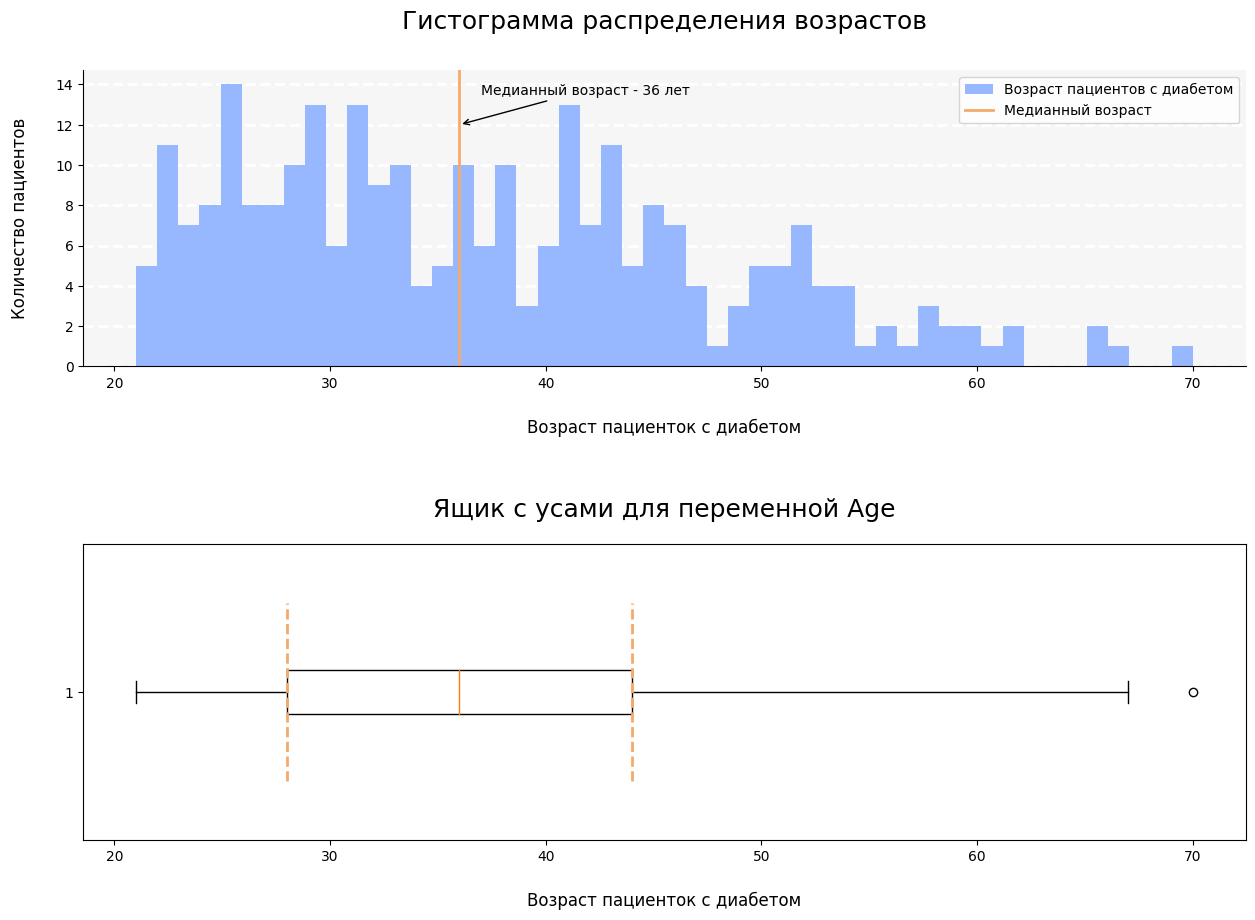

In [ ]:
#Проводим фильтрацию данных
fig1_data = df_diabetes[df_diabetes['Outcome'] == 1]['Age']

fig1, axis1 = plt.subplots(2, 1, figsize = (15, 10))
plt.subplots_adjust(hspace = .6) #настраиваем расстояние между графиками
axis1[0].grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2) #добавляем сетку на первый график
axis1[0].set_facecolor('#F6F6F6')
axis1[0].set_axisbelow(True)

#Отрисовываем первый график
axis1[0].hist(fig1_data, color = graph_color, bins = 50,
           label = 'Возраст пациентов с диабетом')

#Подписываем оси, добавляем линию медианы и подписываем ее
axis1[0].set_xlabel('Возраст пациенток с диабетом', fontsize = 12, labelpad = 20)
axis1[0].set_ylabel('Количество пациентов', fontsize = 12, labelpad = 20)

axis1[0].axvline(fig1_data.median(), color = lines_color,
              label = 'Медианный возраст', linewidth = 2)

axis1[0].annotate(f'Медианный возраст - {int(fig1_data.median())} лет',
               xy = (36, 12), xytext = (37, 13.5),
               arrowprops = dict(arrowstyle = '->', facecolor = 'black'))

#Добавляем заголовок
axis1[0].set_title('Гистограмма распределения возрастов', fontsize = 18, pad = 30)

#Скрываем верхнюю и правую оси графика и добавляем легенду
axis1[0].spines['top'].set_visible(False)
axis1[0].spines['right'].set_visible(False)

axis1[0].legend()

#Отрисовываем второй график, подписываем оси, добавляем вспомогательные линии
axis1[1].boxplot(fig1_data, vert = False);

axis1[1].set_xlabel('Возраст пациенток с диабетом', fontsize = 12, labelpad = 20)

axis1[1].axvline(fig1_data.quantile(0.25), color = lines_color, linewidth = 2,
                 ymin = 0.2, ymax = 0.8, linestyle = '--')
axis1[1].axvline(fig1_data.quantile(0.75), color = lines_color, linewidth = 2,
                 ymin = 0.2, ymax = 0.8, linestyle = '--')

axis1[1].set_title('Ящик с усами для переменной Age', fontsize = 18, pad = 20);

**Вывод:**

Медианный возраст среди пациенток с диагностированым диабетом составляет 36 лет. Основное количество пациенток сосредоточено в возрасте от 28 до 44 лет

**Гипотеза 2**: У пациенток с диагностированым диабетом показатели глюкозы после теста должны быть больше 11.1 ммоль/л

**Важно!** В данном датасете показатель глюкозы представлен в мг/дл, поэтому при аналитике стоит опираться на границы от 200 мг/дл

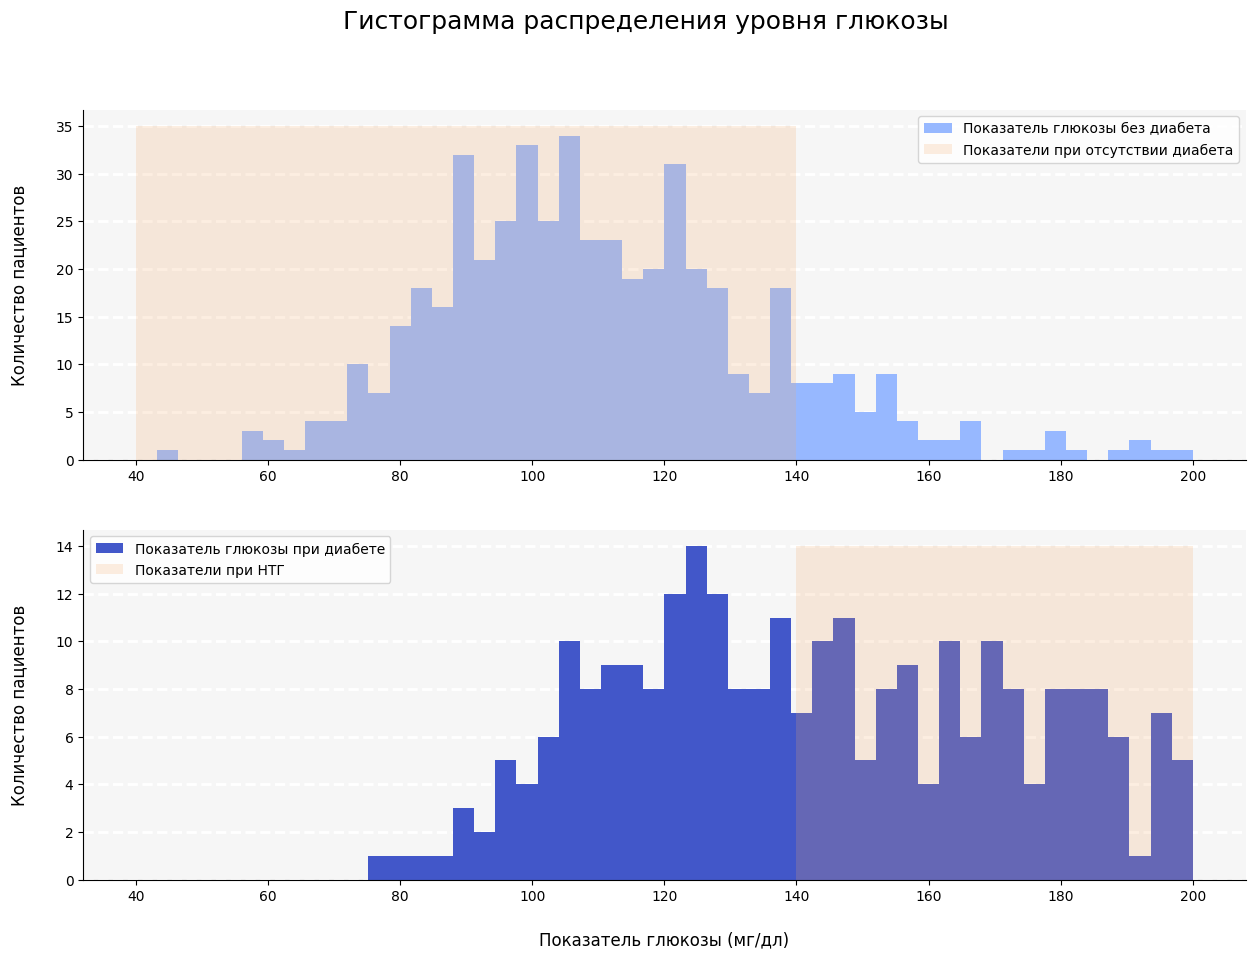

In [ ]:
#Отфильтровываем данные
fig2_1_data = df_diabetes[df_diabetes['Outcome'] == 0]['Glucose']
fig2_2_data = df_diabetes[df_diabetes['Outcome'] == 1]['Glucose']

fig2, axis2 = plt.subplots(2, 1, figsize = (15, 10))

#Добавляем цикл универсальных действий для обоих графиков
for ax in range(2):
    #Добавляем сетку и убираем верхнюю и правую границы
    axis2[ax].grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
    axis2[ax].set_facecolor('#F6F6F6')
    axis2[ax].set_axisbelow(True)

    axis2[ax].spines['top'].set_visible(False)
    axis2[ax].spines['right'].set_visible(False)

#Отрисовываем гистограмы
axis2[0].hist(fig2_1_data, color = graph_color, bins = 50,
           label = 'Показатель глюкозы без диабета', range = [40, 200])
axis2[1].hist(fig2_2_data, color = graph_add_color, bins = 50,
           label = 'Показатель глюкозы при диабете', range = [40, 200])

#Добавляем выделенную зону на оба графика
p1 = patches.Rectangle((40.0, 0), width = 100, height = 35, alpha = .2,
                       facecolor = lines_color,
                       label = 'Показатели при отсутствии диабета')
axis2[0].add_patch(p1)
p2 = patches.Rectangle((140.0, 0), width = 60, height = 14, alpha = .2,
                       facecolor = lines_color, label = 'Показатели при НТГ')
axis2[1].add_patch(p2)

#Подписываем оси, добавляем единый заголовок и показываем легенду
axis2[1].set_xlabel('Показатель глюкозы (мг/дл)', fontsize = 12, labelpad = 20)
axis2[0].set_ylabel('Количество пациентов', fontsize = 12, labelpad = 20)
axis2[1].set_ylabel('Количество пациентов', fontsize = 12, labelpad = 20)

fig2.suptitle('Гистограмма распределения уровня глюкозы', fontsize = 18)

axis2[0].legend()
axis2[1].legend();

**Выводы:**

*   Среди пациенток с отсутствием диагностированного диабета в основном показатель в пределах нормы, но есть также и случаи с показателями в рамках НТГ
*   Показатель глюкозы у пациенток с диабетом находится в пределах нарушения толерантности к глюкозе и ниже

**Гипотеза 3**: Наличие артериальной гипертензии (показатель диастолического артериального давления от 90 мм рт. ст.) свидетельствует о наличии диабета

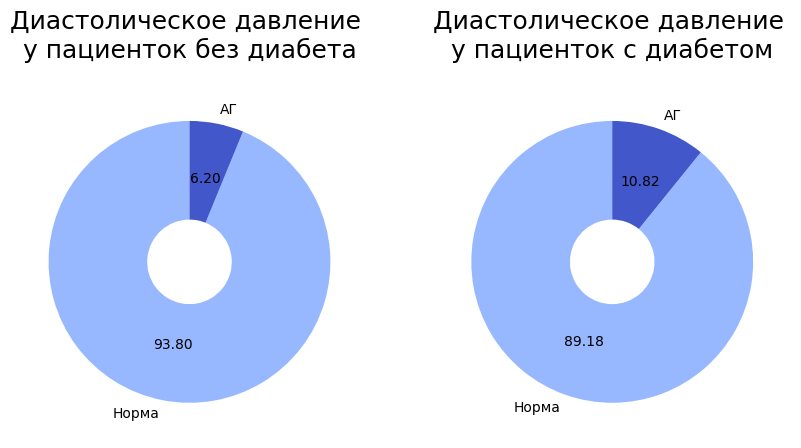

In [ ]:
#Отфильтровываем данные
fig3_1_data = df_diabetes[df_diabetes['Outcome'] == 0]['BloodPressure'].apply(lambda x: 'Норма' if x < 90 else 'АГ').value_counts()
fig3_2_data = df_diabetes[df_diabetes['Outcome'] == 1]['BloodPressure'].apply(lambda x: 'Норма' if x < 90 else 'АГ').value_counts()

fig3, axis3 = plt.subplots(1, 2, figsize = (10, 16))

#Отрисовываем графики
axis3[0].pie(fig3_1_data, colors = [graph_color, graph_add_color],
             wedgeprops=dict(width=0.7), startangle = 90,
             labels = fig3_1_data.index, autopct = '%.2f')
axis3[1].pie(fig3_2_data, colors = [graph_color, graph_add_color],
             wedgeprops=dict(width=0.7), startangle = 90,
             labels = fig3_2_data.index, autopct = '%.2f')

#Подписываем заголовки к графикам
axis3[0].set_title('Диастолическое давление \nу пациенток без диабета',
                   fontsize = 18, pad = 20)
axis3[1].set_title('Диастолическое давление \nу пациенток с диабетом',
                   fontsize = 18, pad = 20);

**Вывод:**

Соотношение нормального артериального давления и артериальной гипертензии у пациенток с диабетом и без отличается не сильно

**Гипотеза 4**: На возникновение диабета влияет повышенный индекс массы тела (показатель от 25 и более)

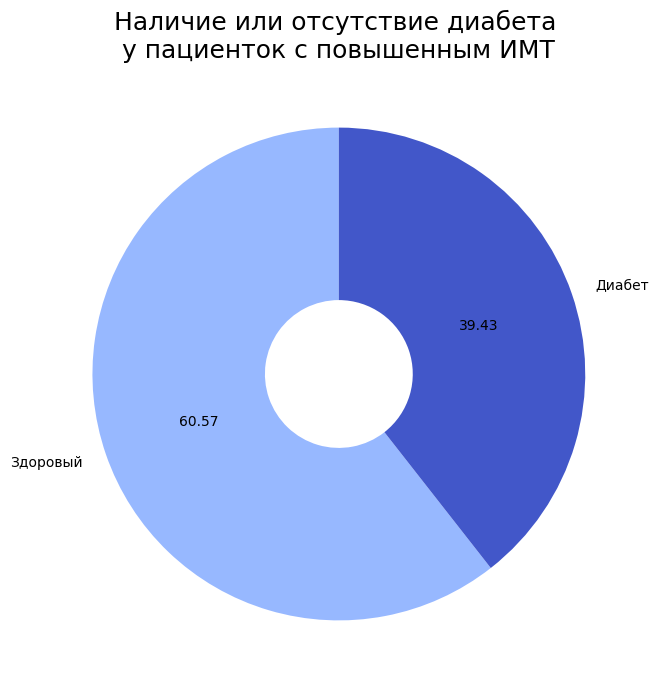

In [ ]:
#Отфильтровываем данные
fig4_data = df_diabetes[df_diabetes['BMI'] >= 25.0]['Outcome'].apply(lambda x: 'Диабет' if x == 1 else 'Здоровый').value_counts()

fig4, axis4 = plt.subplots(figsize = (8, 8))

#Отрисовываем график
axis4.pie(fig4_data, colors = [graph_color, graph_add_color],
          wedgeprops=dict(width=0.7), startangle = 90,
          labels = fig4_data.index, autopct = '%.2f')

#Добавляем заголовок
axis4.set_title('Наличие или отсутствие диабета \nу пациенток с повышенным ИМТ',
                fontsize = 18);

**Вывод:**

В 40% случаев повышенный ИМТ свидетельствует о наличии диабета

**Гипотеза 5**: Существует сильная положительная корреляция между ИМТ и толщиной кожной складки

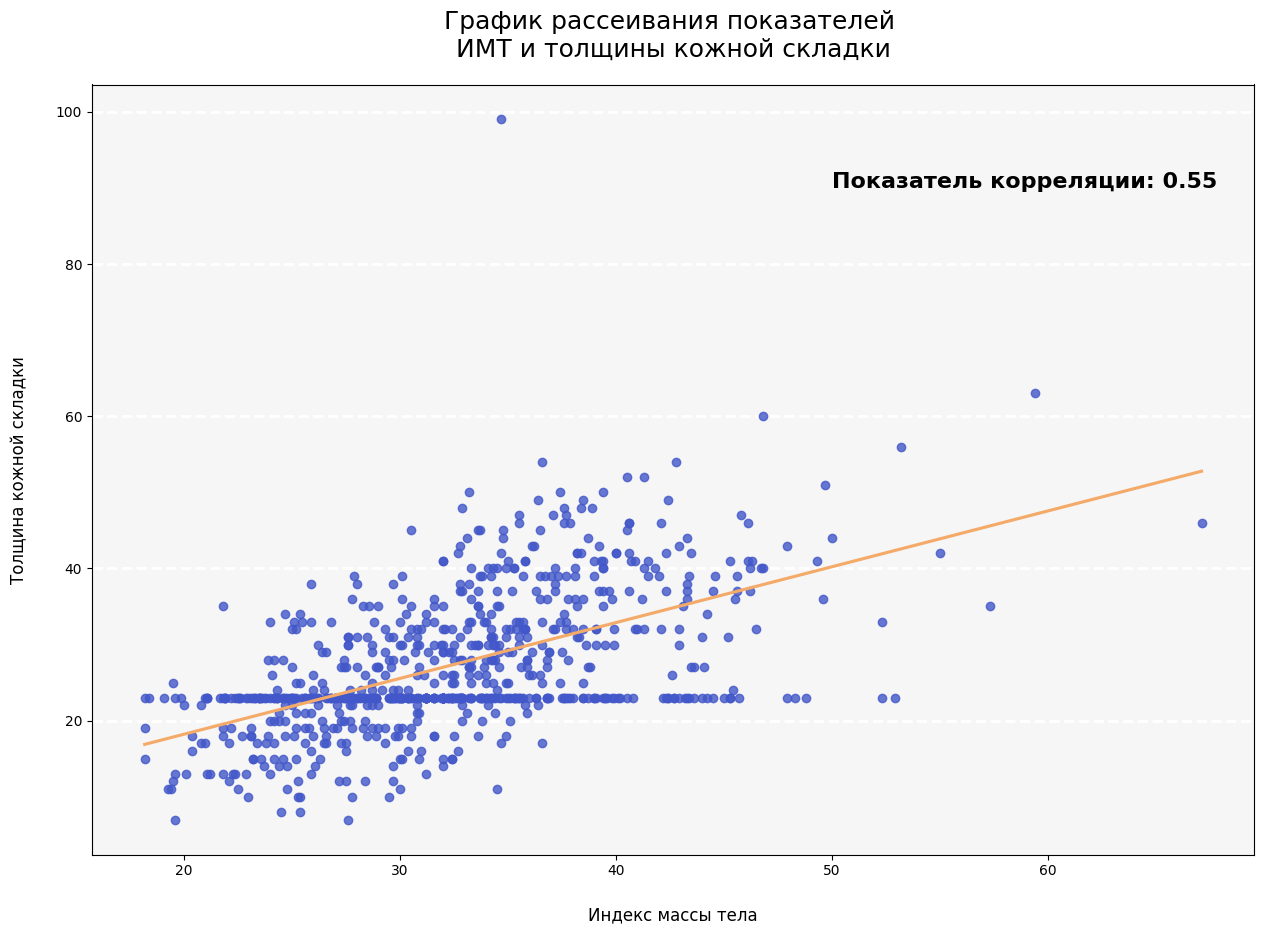

In [ ]:
#Рассчитываем округленную до 2 знаков корреляцию между ИМТ и толщиной кожной складки
corr_BMI = round(df_diabetes.BMI.corr(df_diabetes.SkinThickness), 2)

#Создаем фигуру и добавляем сетку
fig5, axis5 = plt.subplots(figsize = (15, 10))
plt.grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
axis5.set_facecolor('#F6F6F6')
axis5.set_axisbelow(True)

#Отрисовываем график корреляции и добавляем направляющую линию
sns.regplot(x = 'BMI', y = 'SkinThickness', data = df_diabetes, ci = None,
            scatter_kws = dict(color = graph_add_color),
            line_kws = dict(color = lines_color))

#Подписываем оси и заголовок, указываем текстом показатель корреляции
axis5.set_xlabel('Индекс массы тела', fontsize = 12, labelpad = 20)
axis5.set_ylabel('Толщина кожной складки', fontsize = 12, labelpad = 20)

axis5.text(50, 90, f'Показатель корреляции: {corr_BMI}',
           fontdict = dict(fontsize = 16, fontweight = 'semibold'))

axis5.set_title('График рассеивания показателей \nИМТ и толщины кожной складки',
                fontsize = 18, pad = 20);

**Вывод:**

Между индексом массы тела и толщиной кожной складки присутствует заметная прямая корреляция

**Гипотеза 6**: При наличии семейного анамнеза увеличивается риск возникновения диабета

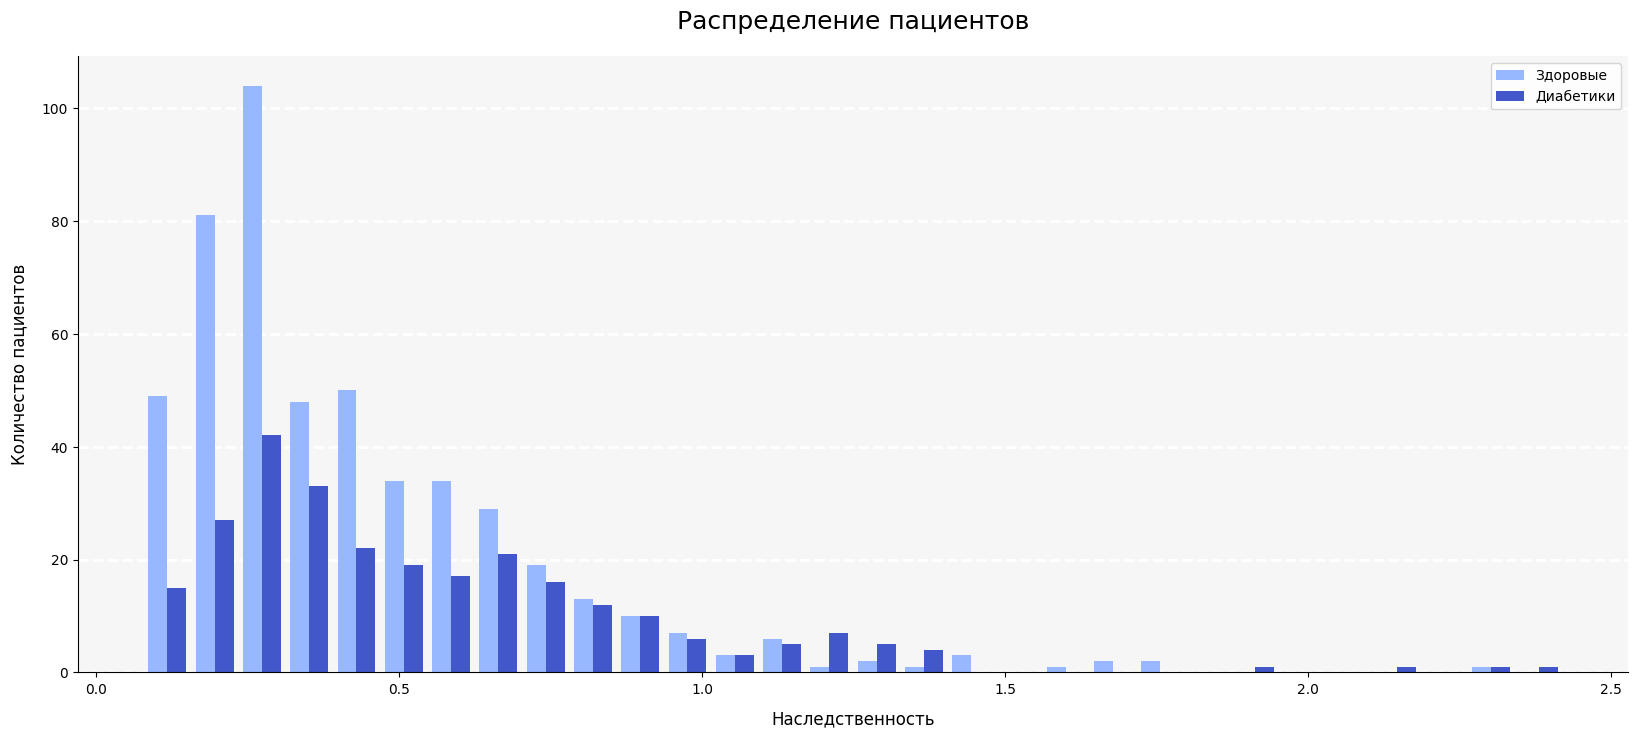

In [ ]:
#Отфильтровываем данные
fig6_1_data = df_diabetes[df_diabetes['Outcome'] == 0]['DiabetesPedigreeFunction']
fig6_2_data = df_diabetes[df_diabetes['Outcome'] == 1]['DiabetesPedigreeFunction']

#Отрисовываем фигуру и добавляем сетку
fig6, axis6 = plt.subplots(figsize = (20, 8))
plt.grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
axis6.set_facecolor('#F6F6F6')
axis6.set_axisbelow(True)

#Отрисовываем график
axis6.hist([fig6_1_data, fig6_2_data], color = [graph_color, graph_add_color],
           bins = 30, label = ['Здоровые', 'Диабетики'])

#Подписываем оси и заголовок, убираем верхнюю и правые границы, добавляем легенду
axis6.set_xlabel('Наследственность', fontsize = 12, labelpad = 10)
axis6.set_ylabel('Количество пациентов', fontsize = 12, labelpad = 10)

axis6.set_title('Распределение пациентов', fontsize = 18, pad = 20)

axis6.spines['top'].set_visible(False)
axis6.spines['right'].set_visible(False)

axis6.legend();

**Вывод:**

Распределение больных диабетом и здоровых пациенток примерно одинаковое

## Добавление второго датасета

In [ ]:
df_cardio = pd.read_csv('train.csv')

df_cardio.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
print(f'Количество наблюдений: {df_cardio.shape[0]}')
print(f'Количество колонок: {df_cardio.shape[1]}')

Количество наблюдений: 3390
Количество колонок: 17


Датасет содержит 3390 наблюдений, отслеживающих наиболее важные факторы риска развития сердечно-сосудистых заболеваний. Все наблюдения распределены по 17 критериям (колонкам):


1.   **id** – уникальный номер наблюдения
2.   **age** – возраст пациента
3.   **education** – уровень образования (Неоконченная старшая школа (1), оконченная старшая школа (2), неоконченный высшее (3), оконченное высшее (4))
4.   **sex** – пол пациента
5.   **is_smoking** –  бинарная переменная является ли пациент курильщиком
6.   **cigsPerDay** – количество сигарет, которое человек в среднем выкуривает за день
7.   **BPMeds** – бинарная переменная принимал ли пациент лекарство от артериального давления
8.   **prevalentStroke** – бинарная переменная перенес ли пациент ранее инсульт
9.   **prevalentHyp** – бинарная переменная была ли у пациента гипертензия
10.  **diabetes** - бинарная переменная был ли у пациента диабет
11.  **totChol** - уровень общего холестерина
12.  **sysBP** - систолическое артериальное давление
13.  **diaBP** - диастолическое артериальное давление
14.  **BMI** - индекс массы тела
15.  **heartRate** - частота сердечных сокращений
16.  **glucose** - уровень глюкозы
17.  **TenYearCHD** - 10-летний риск развития ишемической болезни сердца


**Подготовка к объединению**

In [ ]:
#Добавляем колонку с полом ко всем пациенткам первого датасета
df_diabetes['sex'] = 'F'
#Переименовываем схожие по смыслу колонки
df_diabetes.rename(columns = {'Glucose': 'glucose', 'BloodPressure': 'diaBP',
                              'Age':'age', 'Outcome':'diabetes'}, inplace = True)

df_diabetes

,Pregnancies,glucose,diaBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,diabetes,sex
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,F
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0,F
2,8,183.0,64.0,23.0,0,23.3,0.672,32,1,F
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0,F
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1,F
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0,F
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0,F
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0,F
766,1,126.0,60.0,23.0,0,30.1,0.349,47,1,F


**Объединяем датасеты**

In [ ]:
df_diabetes_cardio = pd.concat([df_cardio, df_diabetes], ignore_index = True)
df_diabetes_cardio.head()

In [ ]:
print(f'Количество наблюдений: {df_diabetes_cardio.shape[0]}')
print(f'Количество колонок: {df_diabetes_cardio.shape[1]}')

Количество наблюдений: 4158
Количество колонок: 21


**Проверка данных на информативность**

In [ ]:
#Создаем список колонок с неинформативными значениями
low_information_cols = []

for col in df_diabetes_cardio.columns:
    #Рассчитываем частоту одинаковых значений
    top_freq = df_diabetes_cardio[col].value_counts(normalize=True).max()
    #Рассчитываем долю уникальных значений от общего размера признака
    nunique_ratio = df_diabetes_cardio[col].nunique() / df_diabetes_cardio[col].count()
    #Сравниваем частоту одинаковых значений с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    #Сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
BPMeds: 97.01% одинаковых значений
prevalentStroke: 99.35% одинаковых значений


In [ ]:
#Выводим среднее значение пропущенных данных, округленное до двух знанов после запятой
df_diabetes_cardio.isnull().mean().round(2).sort_values(ascending=False)

DiabetesPedigreeFunction    0.82
Insulin                     0.82
SkinThickness               0.82
Pregnancies                 0.82
education                   0.21
BPMeds                      0.20
totChol                     0.19
cigsPerDay                  0.19
prevalentStroke             0.18
prevalentHyp                0.18
sysBP                       0.18
heartRate                   0.18
TenYearCHD                  0.18
is_smoking                  0.18
id                          0.18
glucose                     0.07
diabetes                    0.00
age                         0.00
diaBP                       0.00
BMI                         0.00
sex                         0.00
dtype: float64

In [ ]:
#Добавляем в список удаляемых колонок те, где количество пропущенных значений превышает 30%
for col in df_diabetes_cardio.columns:
    if df_diabetes_cardio[col].isnull().mean().round(2) > 0.3:
      low_information_cols.append(col)

In [ ]:
#Удаляем колонки, определенные как неинформативные
df_diabetes_cardio_clean = df_diabetes_cardio.drop(low_information_cols, axis = 1)

In [ ]:
print(f'Итоговое количество наблюдений: {df_diabetes_cardio_clean.shape[0]}')
print(f'Итоговое количество колонок: {df_diabetes_cardio_clean.shape[1]}')

Итоговое количество наблюдений: 4158
Итоговое количество колонок: 14


In [ ]:
#Заменяем данные в колонках
for col in df_diabetes_cardio_clean.columns:
  #Если колонка содержит текстовые данные, заполняем их модой
  if df_diabetes_cardio_clean[col].dtypes == object:
    replace_val = df_diabetes_cardio_clean[col].mode()[0]
  #В других случаях считаем медиану
  else:
    replace_val = df_diabetes_cardio_clean[col].median()
  df_diabetes_cardio_clean[col] = df_diabetes_cardio_clean[col].fillna(replace_val)

## Аналитика новых данных

In [ ]:
df_diabetes_cardio_clean.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,221.0,148.0,85.0,26.05,90.0,80.0,1.0
1,36,4.0,M,NO,0.0,1.0,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,46,1.0,F,YES,10.0,0.0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,50,1.0,M,YES,20.0,1.0,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,64,1.0,F,YES,30.0,0.0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


Средний показатель больных диабетом в мире составляет 8,8%.

**Гипотеза 1**: Среднее значение больных диабетов в представленной выборке будет соответствовать среднему значению по миру

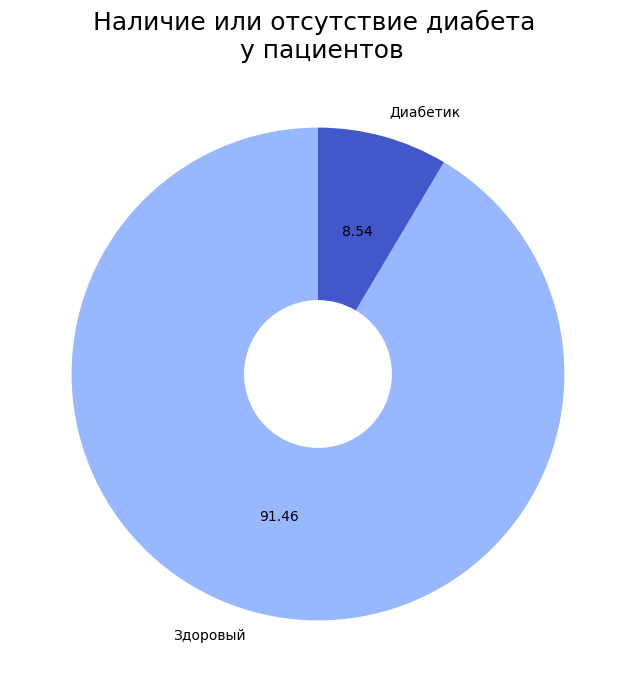

In [ ]:
#Отфильтровываем данные
fig7_data = df_diabetes_cardio_clean['diabetes'].value_counts()

fig7, axis7 = plt.subplots(figsize = (8, 8))

#Отрисовываем график
axis7.pie(fig7_data, colors = [graph_color, graph_add_color],
          wedgeprops=dict(width=0.7), startangle = 90,
          labels = ['Здоровый', 'Диабетик'], autopct = '%.2f')

#Добавляем заголовок
axis7.set_title('Наличие или отсутствие диабета \n у пациентов',
                fontsize = 18);

**Вывод:**

Показатель больных диабетом в представленной выборке составляет 8,54%, что ниже среднемирового показателя

Средний показатель курильщиков по миру составляет 15,34% от всего населения планеты

**Гипотеза 2**: Соотношение кульщиков к некурильщикам в данной выборке останется таким же, как и соотношение в мире

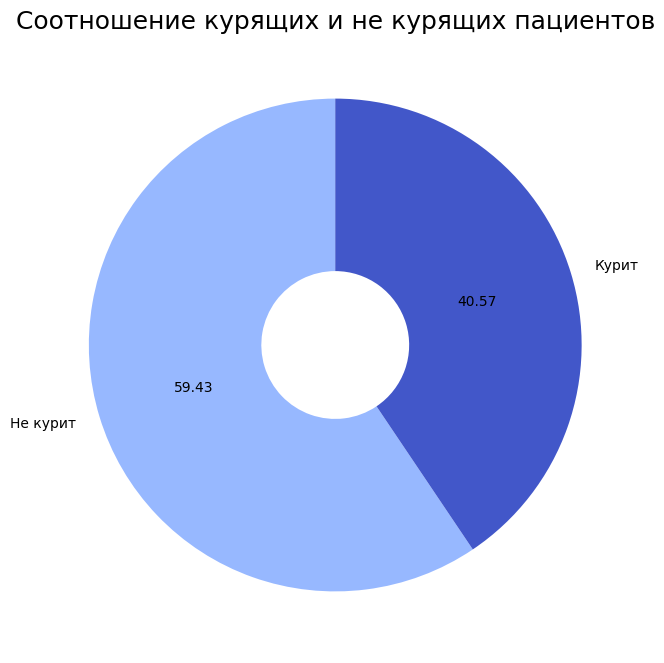

In [ ]:
#Отфильтровываем данные
fig8_data = df_diabetes_cardio_clean['is_smoking'].value_counts()

fig8, axis8 = plt.subplots(figsize = (8, 8))

#Отрисовываем график
axis8.pie(fig8_data, colors = [graph_color, graph_add_color],
          wedgeprops=dict(width=0.7), startangle = 90,
          labels = ['Не курит', 'Курит'], autopct = '%.2f')

#Добавляем заголовок
axis8.set_title('Соотношение курящих и не курящих пациентов',
                fontsize = 18);

**Вывод:**

В данной выборке показатель курящих среди пациентов выше, чем средний в мире

**Гипотеза 3**: Чем выше уровень образование пациента, тем лучше они следят за своим здоровьем, то есть:


*   Меньший процент курящих
*   Меньший процент сталкивался с гипертензией
*   Обладают индексом массы тела в пределах нормы (от 18,5 до 25)
*   Меньший процент страдает диабетом



In [ ]:
#Группируем данные по колонкам с уровнем образования и указанием курит ли человек
smoking_bar = df_diabetes_cardio_clean.groupby(['education', 'is_smoking']).size().unstack()
#Создаем два списка с итоговыми значениями для графика
bar_labels_smoking = []
bar_labels_no_smoking = []
#Проходим по каждой паре значений и проверяем индекс числа внутри пары
for col in smoking_bar.values:
    for ind in col:
        #Если число идет первым, то относим его к списку данных для некурящих
        if col[0] == ind:
            bar_labels_no_smoking.append(ind/sum(col)*100)
        else:
            bar_labels_smoking.append(ind/sum(col)*100)

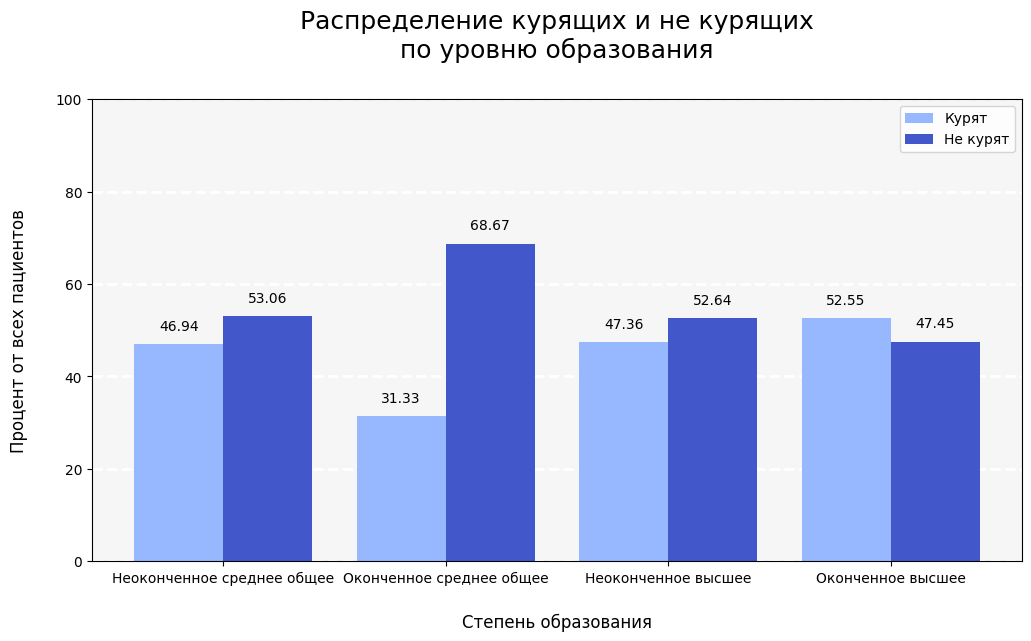

In [ ]:
#Записываем датафрейм в более короткую по названию переменную
fig9_data = df_diabetes_cardio_clean

#Создаем фигуру и добавляем сетку
fig9, axis9 = plt.subplots(figsize = (12, 6))
axis9.grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
axis9.set_facecolor('#F6F6F6')
axis9.set_axisbelow(True)
axis9.set_ylim([0, 100])

#Устанавливаем набор значений по оси Х и толщину столбцов на графике
x = np.arange(len(np.sort(fig9_data.education.unique(), axis=None)))
bar_width = 0.4

#Отрисовываем графики и записываем их в переменные
bar_chart_smoking = axis9.bar(x, bar_labels_smoking, bar_width,
                                 color = graph_color)
bar_chart_no_smoking = axis9.bar(x + bar_width, bar_labels_no_smoking, #смещаем координаты Х на ширину столбца
                                    bar_width, color = graph_add_color)

#Добавляем подписи осей и заголовок
axis9.set_xlabel('Степень образования', fontsize = 12, labelpad = 20)
axis9.set_ylabel('Процент от всех пациентов', fontsize = 12, labelpad = 20)
axis9.set_title('Распределение курящих и не курящих\nпо уровню образования',
                   fontsize = 18, pad = 30)
#Устанавливаем расстояние между отметками на оси Х и подписываем их
axis9.set_xticks(x + bar_width / 2)
axis9.set_xticklabels(['Неоконченное среднее общее', 'Оконченное среднее общее',
                          'Неоконченное высшее', 'Оконченное высшее'])
#Добавляем легенду
axis9.legend(['Курят', 'Не курят'])

#Добавляем подписи со значениями к столбцам
axis9.bar_label(bar_chart_smoking, padding = 8, fontsize = 10,
                   labels = ['%.2f' % el for el in bar_labels_smoking]) #добавляем форматирование текста для подписи
axis9.bar_label(bar_chart_no_smoking, padding = 8, fontsize = 10,
                   labels = ['%.2f' % el for el in bar_labels_no_smoking]);

**Вывод**

Большинство некурящих пациентов встречается среди тех, кто имеет лишь оконченную старшую школу, в то время как соотношение курящих и некурящих среди обладателей высшего образования стремится к равномерному соотношению

In [ ]:
#Группируем данные по колонкам с уровнем образования и указанием сталкивался ли пациент с гипертензией
hyp_bar = df_diabetes_cardio_clean.groupby(['education', 'prevalentHyp']).size().unstack()
#Создаем два списка с итоговыми значениями для графика
bar_labels_hyp = []
bar_labels_no_hyp = []
#Проходим по каждой паре значений и проверяем индекс числа внутри пары
for col in hyp_bar.values:
    for ind in col:
        #Если число идет первым, то относим его к списку данных пациентов без гипертензии
        if col[0] == ind:
            bar_labels_no_hyp.append(ind/sum(col)*100)
        else:
            bar_labels_hyp.append(ind/sum(col)*100)

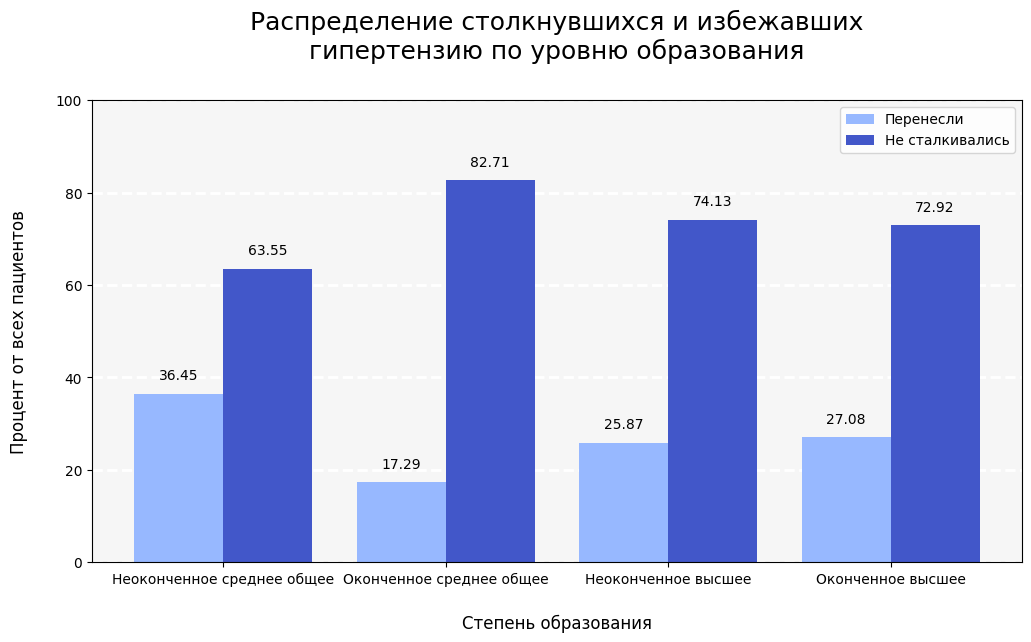

In [ ]:
#Записываем датафрейм в более короткую по названию переменную
fig10_data = df_diabetes_cardio_clean

#Создаем фигуру и добавляем сетку
fig10, axis10 = plt.subplots(figsize = (12, 6))
axis10.grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
axis10.set_facecolor('#F6F6F6')
axis10.set_axisbelow(True)
axis10.set_ylim([0, 100])

#Устанавливаем набор значений по оси Х и толщину столбцов на графике
x = np.arange(len(np.sort(fig10_data.education.unique(), axis=None)))
bar_width = 0.4

#Отрисовываем графики и записываем их в переменные
bar_chart_hyp = axis10.bar(x, bar_labels_hyp, bar_width, color = graph_color)
bar_chart_no_hyp = axis10.bar(x + bar_width, bar_labels_no_hyp,  #смещаем координаты Х на ширину столбца
                             bar_width, color = graph_add_color)

#Добавляем подписи осей и заголовок
axis10.set_xlabel('Степень образования', fontsize = 12, labelpad = 20)
axis10.set_ylabel('Процент от всех пациентов', fontsize = 12, labelpad = 20)
axis10.set_title('Распределение столкнувшихся и избежавших\nгипертензию по уровню образования',
                   fontsize = 18, pad = 30)
#Устанавливаем расстояние между отметками на оси Х и подписываем их
axis10.set_xticks(x + bar_width / 2)
axis10.set_xticklabels(['Неоконченное среднее общее', 'Оконченное среднее общее',
                          'Неоконченное высшее', 'Оконченное высшее'])
#Добавляем легенду
axis10.legend(['Перенесли', 'Не сталкивались'])

#Добавляем подписи со значениями к столбцам
axis10.bar_label(bar_chart_hyp, padding = 8, fontsize = 10,
                   labels = ['%.2f' % el for el in bar_labels_hyp])  #добавляем форматирование текста для подписи
axis10.bar_label(bar_chart_no_hyp, padding = 8, fontsize = 10,
                   labels = ['%.2f' % el for el in bar_labels_no_hyp]);

**Вывод**

Большинство пациентов в целом никогда не сталкивались с артериальной гипертензией, но среди столкнувшихся реже всего она встречалась у тех, кто имеет оконченное среднее общее образование

In [ ]:
#Группируем данные по колонкам с уровнем образования и средним ИМТ
bar_bmi = list(df_diabetes_cardio_clean.groupby('education')['BMI'].mean())
#Создаем два списка с итоговыми значениями для графика
bar_bmi_normal = []
bar_bmi_unnormal = []
#Проходим по каждой категории образования
for col in np.sort(df_diabetes_cardio_clean.education.unique(), axis=None): #выделяем уникальные значения и сортируем их в порядке увеличения
    #Считаем общее количество пациентов в данной категории образования
    bmi_count = df_diabetes_cardio_clean[
        (df_diabetes_cardio_clean['education'] == col)].shape[0]
    #Отфильтровываем данные и применяем анонимную функцию к столбцу с ИМТ
    #Суммируем получившийся набор данных, чтобы определить количество пациентов с нормальным ИМТ
    bmi_normal_count = df_diabetes_cardio_clean[
         (df_diabetes_cardio_clean['education'] == col)]['BMI'].apply(
             lambda x: 1 if 18.5 <= x and x <= 25 else 0 #если значение ИМТ больше и равно 18,5 и меньше и равно 25, то присуждаем 1, в другом случае 0
         ).sum()
    #Добавляем в списки процент пациентов с нормальным и ненормальных ИМТ
    bar_bmi_normal.append((bmi_normal_count / bmi_count) * 100)
    bar_bmi_unnormal.append(100 - ((bmi_normal_count / bmi_count) * 100))

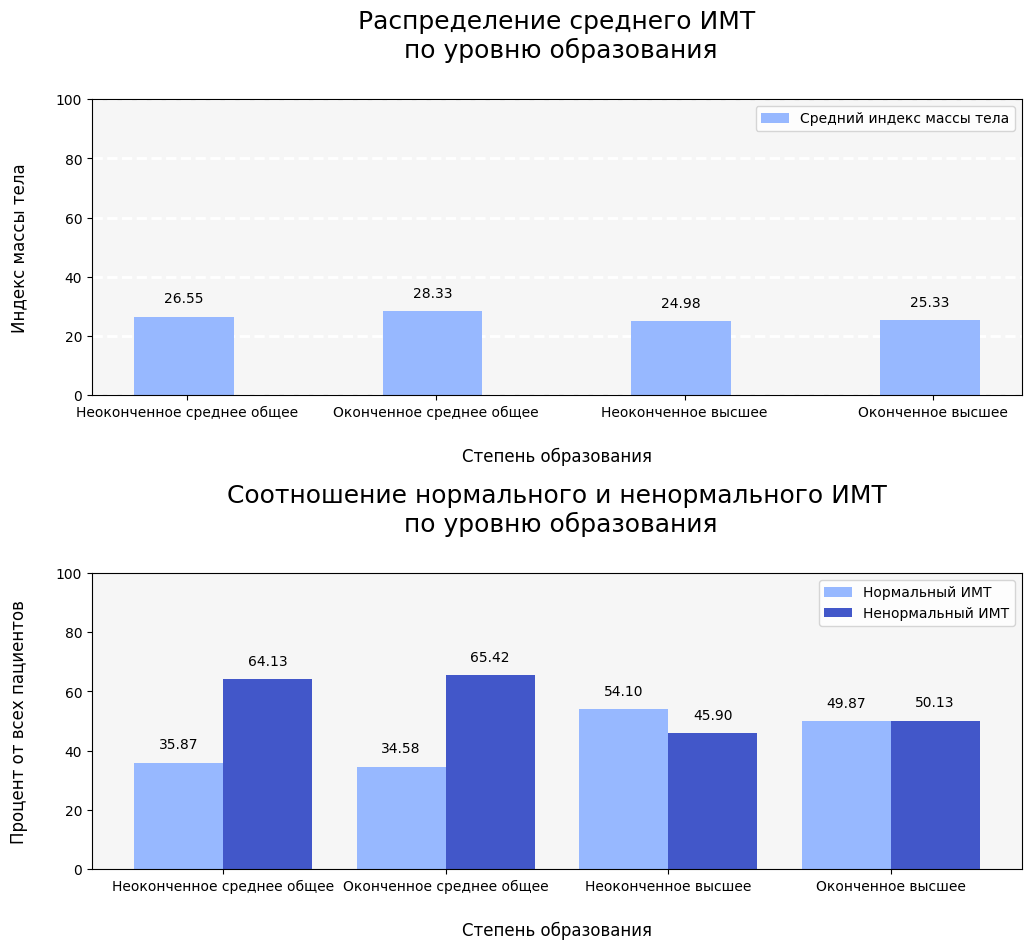

In [ ]:
#Записываем датафрейм в более короткую по названию переменную
fig11_data = df_diabetes_cardio_clean

#Создаем фигуру и добавляем сетку на первый график
fig11, axis11 = plt.subplots(2, 1, figsize = (12, 10))
axis11[0].grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
plt.subplots_adjust(hspace = .6)

#Добавляем цикл универсальных действий для обоих графиков
for ax in range(2):
    axis11[ax].set_facecolor('#F6F6F6')
    axis11[ax].set_axisbelow(True)
    axis11[ax].set_ylim([0, 100])

#Устанавливаем набор значений по оси Х и толщину столбцов на графике
x = np.arange(len(np.sort(fig11_data.education.unique(), axis=None)))
bar_width = 0.4

#Отрисовываем график и записываем его в переменную
bar_chart_bmi = axis11[0].bar(x, bar_bmi, bar_width, color = graph_color,
                           align = 'center')

#Добавляем подписи осей и заголовок
axis11[0].set_xlabel('Степень образования', fontsize = 12, labelpad = 20)
axis11[0].set_ylabel('Индекс массы тела', fontsize = 12, labelpad = 20)
axis11[0].set_title('Распределение среднего ИМТ\n по уровню образования',
                   fontsize = 18, pad = 30)
#Устанавливаем расстояние между отметками на оси Х и подписываем их
axis11[0].set_xticks(x + bar_width / 30)
axis11[0].set_xticklabels(['Неоконченное среднее общее', 'Оконченное среднее общее',
                          'Неоконченное высшее', 'Оконченное высшее'])
#Добавляем легенду
axis11[0].legend(['Средний индекс массы тела'])

#Добавляем подписи со значениями к столбцам
axis11[0].bar_label(bar_chart_bmi, padding = 8, fontsize = 10,
                   labels = ['%.2f' % el for el in bar_bmi])

#Отрисовываем графики и записываем их в переменные
bar_chart_bmi_normal = axis11[1].bar(x, bar_bmi_normal, bar_width,
                                     color = graph_color)
bar_chart_bmi_unnormal = axis11[1].bar(x + bar_width, bar_bmi_unnormal,
                                       bar_width, color = graph_add_color)

#Добавляем подписи осей и заголовок
axis11[1].set_xlabel('Степень образования', fontsize = 12, labelpad = 20)
axis11[1].set_ylabel('Процент от всех пациентов', fontsize = 12, labelpad = 20)
axis11[1].set_title('Соотношение нормального и ненормального ИМТ\n по уровню образования',
                   fontsize = 18, pad = 30)
#Устанавливаем расстояние между отметками на оси Х и подписываем их
axis11[1].set_xticks(x + bar_width / 2)
axis11[1].set_xticklabels(['Неоконченное среднее общее', 'Оконченное среднее общее',
                          'Неоконченное высшее', 'Оконченное высшее'])
#Добавляем легенду
axis11[1].legend(['Нормальный ИМТ', 'Ненормальный ИМТ'])

#Добавляем подписи со значениями к столбцам
axis11[1].bar_label(bar_chart_bmi_normal, padding = 8, fontsize = 10,
                   labels = ['%.2f' % el for el in bar_bmi_normal])
axis11[1].bar_label(bar_chart_bmi_unnormal, padding = 8, fontsize = 10,
                   labels = ['%.2f' % el for el in bar_bmi_unnormal]);

**Вывод**

Средний ИМТ среди всех уровней образования примерно одинаков и в большинстве случаев превышает норму, что может говорить о наличии в каждой категории людей с лишним весом

Соотношение нормального (в пределах от 18,5 до 25) ИМТ и ненормального (меньше 18,5 или больше 25) среди категорий с высшим образованием стремится к превалированию нормального ИМТ. В то же время люди без какого-либо высшего образования чаще сталкиваются с дефицитом или же профицитом ИМТ

In [ ]:
#Группируем данные по колонкам с уровнем образования и указанием болеет ли пациент диабетом
diabete_bar = df_diabetes_cardio_clean.groupby(['education', 'diabetes']).size().unstack()
#Создаем два списка с итоговыми значениями для графика
bar_labels_diabete = []
bar_labels_no_diabete = []
#Проходим по каждой паре значений и проверяем индекс числа внутри пары
for col in diabete_bar.values:
    for ind in col:
        #Если число идет первым, то относим его к списку данных о пациентах без диабета
        if col[0] == ind:
            bar_labels_no_diabete.append(ind/sum(col)*100)
        else:
            bar_labels_diabete.append(ind/sum(col)*100)

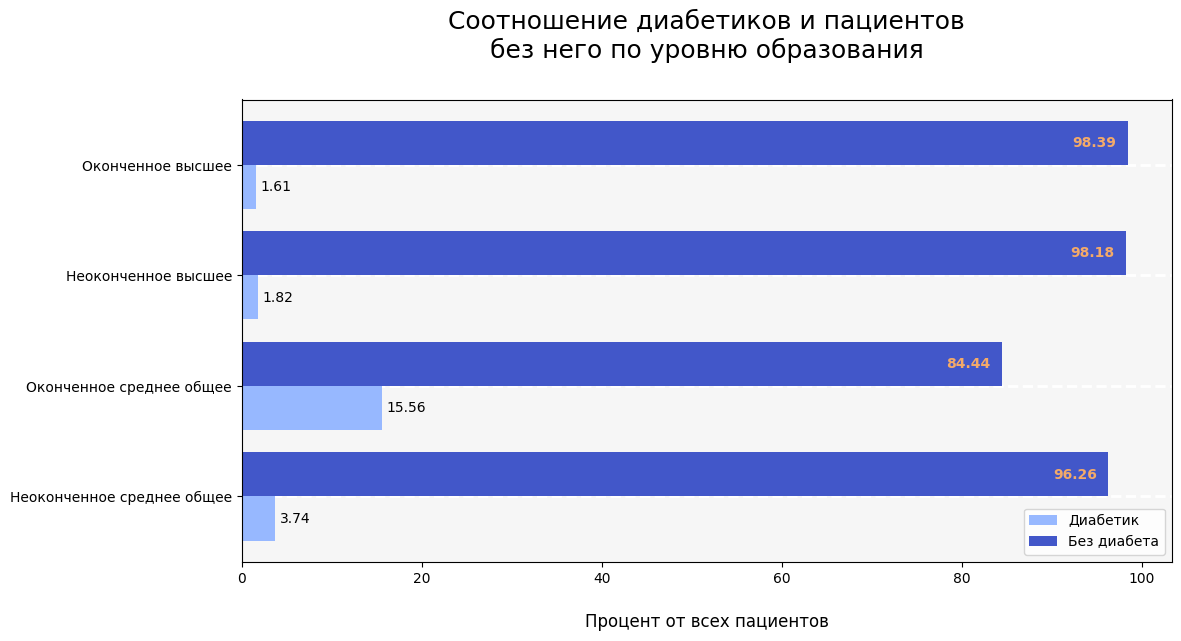

In [ ]:
#Записываем датафрейм в более короткую по названию переменную
fig12_data = df_diabetes_cardio_clean

#Создаем фигуру и добавляем сетку
fig12, axis12 = plt.subplots(figsize = (12, 6))
axis12.grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
axis12.set_facecolor('#F6F6F6')
axis12.set_axisbelow(True)

#Устанавливаем набор значений по оси Х и толщину столбцов на графике
x = np.arange(len(np.sort(fig12_data.education.unique(), axis=None)))
bar_height = 0.4

#Отрисовываем графики и записываем их в переменные
bar_chart_diabete = axis12.barh(x, bar_labels_diabete, height = bar_height,
                               color = graph_color)
bar_chart_no_diabete = axis12.barh(x + bar_width, bar_labels_no_diabete,
                                   height = bar_height, color = graph_add_color)

#Добавляем подпись оси Х и заголовок
axis12.set_xlabel('Процент от всех пациентов', fontsize = 12, labelpad = 20)
axis12.set_title('Соотношение диабетиков и пациентов\nбез него по уровню образования',
                   fontsize = 18, pad = 30)
#Устанавливаем расстояние между отметками на оси Y и подписываем их
axis12.set_yticks(x + bar_height / 2)
axis12.set_yticklabels(['Неоконченное среднее общее', 'Оконченное среднее общее',
                          'Неоконченное высшее', 'Оконченное высшее'])
#Добавляем легенду
axis12.legend(['Диабетик', 'Без диабета'])

#Добавляем подписи со значениями к столбцам
axis12.bar_label(bar_chart_diabete, padding = 3, fontsize = 10,
                 labels = ['%.2f' % el for el in bar_labels_diabete])
axis12.bar_label(bar_chart_no_diabete, padding = -40, fontsize = 10,
                 labels = ['%.2f' % el for el in bar_labels_no_diabete],
                 color = lines_color, fontweight = 'bold');

**Вывод**

В основном в представленной выборке большинство пациентов не страдают диабетом, но в категории оконченного среднего общего образования заметен крайне высокий процент пациентов с диабетом. У категорий высшего образования процентный показатель больных диабетом не превышает 2%

**Гипотеза 4**: Наличие диабета ухудшает прогноз по развитию кардиальной патологии

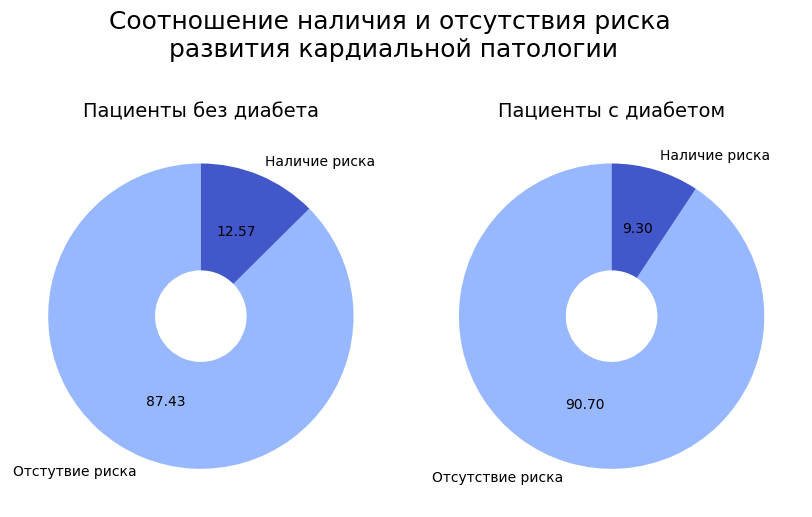

In [ ]:
#Отфильтровываем данные
fig13_1_data = df_diabetes_cardio_clean[df_diabetes_cardio_clean.diabetes == 0.0]['TenYearCHD'].value_counts()
fig13_2_data = df_diabetes_cardio_clean[df_diabetes_cardio_clean.diabetes == 1.0]['TenYearCHD'].value_counts()

fig13, axis13 = plt.subplots(1, 2, figsize = (8, 6))

#Отрисовываем графики
axis13[0].pie(fig13_1_data, colors = [graph_color, graph_add_color],
              wedgeprops=dict(width=0.7), startangle = 90,
              labels = ['Отстутвие риска', 'Наличие риска'], autopct = '%.2f')
axis13[1].pie(fig13_2_data, colors = [graph_color, graph_add_color],
              wedgeprops=dict(width=0.7), startangle = 90,
              labels = ['Отсутствие риска', 'Наличие риска'], autopct = '%.2f')

#Добавляем один общий заголовок и дополнительные заголовки к каждому графику
fig13.suptitle('Соотношение наличия и отсутствия риска \nразвития кардиальной патологии',
               fontsize = 18)
fig13.tight_layout(pad = -1.0) #устанавливаем отступ для общего заголовка
axis13[0].set_title('Пациенты без диабета', fontsize = 14)
axis13[1].set_title('Пациенты с диабетом', fontsize = 14);

**Вывод**

Наличие риска развития кардиальной патологии у пациентов с диабетом и без него близко, но при этом у пациентов без диабета риск возникновения встречается чаще, чем у пациентов с диабетом

## Добавление третьего датасета

In [ ]:
df_binary = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df_binary.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
print(f'Количество наблюдений: {df_binary.shape[0]}')
print(f'Количество колонок: {df_binary.shape[1]}')

Количество наблюдений: 253680
Количество колонок: 22


In [ ]:
#Список колонок с неинформативными значениями
low_information_cols = []

for col in df_binary.columns:
    #Рассчитываем частоту одинаковых значений
    top_freq = df_binary[col].value_counts(normalize=True).max()
    #Рассчитываем долю уникальных значений от общего размера признака
    nunique_ratio = df_binary[col].nunique() / df_binary[col].count()
    #Сравниваем частоту одинаковых значений с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    #Сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

CholCheck: 96.27% одинаковых значений
Stroke: 95.94% одинаковых значений
AnyHealthcare: 95.11% одинаковых значений


In [ ]:
df_binary = df_binary.drop(low_information_cols, axis=1)
print(f'Итоговое количество колонок: {df_binary.shape[1]}')

Результирующее число признаков: 19


**Подготавливаем и объединяем датафреймы**

In [ ]:
#Удаляем ненужные колонки с данными, которых нет в добавляемом датафрейме
df_diabetes_cardio = df_diabetes_cardio.drop(['education', 'cigsPerDay', 'sysBP',
                                              'heartRate', 'glucose', 'TenYearCHD',
                                              'Pregnancies', 'SkinThickness',
                                              'Insulin',
                                              'DiabetesPedigreeFunction', 'id',
                                              'BPMeds', 'prevalentStroke'],
                                             axis=1)
df_diabetes_cardio.head()

,age,sex,is_smoking,prevalentHyp,diabetes,totChol,diaBP,BMI
0,64,F,YES,0.0,0,221.0,85.0,NaN
1,36,M,NO,1.0,0,212.0,98.0,29.77
2,46,F,YES,0.0,0,250.0,71.0,20.35
3,50,M,YES,1.0,0,233.0,88.0,28.26
4,64,F,YES,0.0,0,241.0,85.0,26.42


In [ ]:
#Удаляем ненужные колонки, которых не было в предыдущих датафреймах
df_binary = df_binary.drop(['PhysActivity',	'Fruits', 'Veggies',
                            'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth',
                            'MentHlth', 'PhysHlth', 'DiffWalk', 'Education',
                            'Income'], axis=1)
df_binary.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,HeartDiseaseorAttack,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,11.0


Так как в заключительном датасете возраст представлен категориальным делением, создаем функцию для перевода возрастов из годов в категории

In [ ]:
#Создаем функцию для перевода числового признака Age в категориальный
def get_age_cat(age):
        if age >= 18 and age < 24:
            return 1
        elif age >= 25 and age < 30:
            return 2
        elif age >= 30 and age < 35:
            return 3
        elif age >= 35 and age < 40:
            return 4
        elif age >= 40 and age < 45:
            return 5
        elif age >= 45 and age < 50:
            return 6
        elif age >= 50 and age < 55:
            return 7
        elif age >= 55 and age < 60:
            return 8
        elif age >= 60 and age < 65:
            return 9
        elif age >= 65 and age < 70:
            return 10
        elif age >= 70 and age < 75:
            return 11
        elif age >= 75 and age < 80:
            return 12
        elif age > 80:
            return 13

#Переводим числовой признак в категориальный
df_diabetes_cardio['age'] = df_diabetes_cardio['age'].apply(get_age_cat)

In [ ]:
#С помощью анонимных функций изменяем данные, чтобы они соотвествовали друг другу
df_binary['Sex'] = df_binary['Sex'].apply(lambda x: 'F' if x == 1.0 else 'M')

df_binary['Smoker'] = df_binary['Smoker'].apply(lambda x: 'YES' if x == 1.0 else 'NO')

df_diabetes_cardio['totChol'] = df_diabetes_cardio['totChol'].apply(lambda x: 1 if x >= 200 else 0)

df_diabetes_cardio['diaBP'] = df_diabetes_cardio['diaBP'].apply(lambda x: 1 if x >= 90 else 0)

#Переименовываем некоторые колонки
df_diabetes_cardio.rename(columns={'age':'Age', 'sex':'Sex',
                                   'is_smoking':'Smoker',
                                   'prevalentHyp':'HeartDiseaseorAttack',
                                   'diabetes':'Diabetes_binary',
                                   'totChol':'HighChol', 'diaBP':'HighBP'},
                          inplace=True)

In [ ]:
#Объединяем датасеты
df_diabetes_binary = pd.concat([df_diabetes_cardio, df_binary], ignore_index=True)
df_diabetes_binary

,Age,Sex,Smoker,HeartDiseaseorAttack,Diabetes_binary,HighChol,HighBP,BMI
0,9.0,F,YES,0.0,0.0,1.0,0.0,NaN
1,4.0,M,NO,1.0,0.0,1.0,1.0,29.77
2,6.0,F,YES,0.0,0.0,1.0,0.0,20.35
3,7.0,M,YES,1.0,0.0,1.0,0.0,28.26
4,9.0,F,YES,0.0,0.0,1.0,0.0,26.42
...,...,...,...,...,...,...,...,...
257833,5.0,F,NO,0.0,0.0,1.0,1.0,45.00
257834,11.0,M,NO,0.0,1.0,1.0,1.0,18.00
257835,2.0,M,NO,0.0,0.0,0.0,0.0,28.00
257836,7.0,F,NO,0.0,0.0,0.0,1.0,23.00


In [ ]:
#Выводим среднее значение пропущенных данных, округленное до двух знанов после запятой
df_diabetes_binary.isnull().mean().round(2).sort_values(ascending = False)

Age                     0.0
Sex                     0.0
Smoker                  0.0
HeartDiseaseorAttack    0.0
Diabetes_binary         0.0
HighChol                0.0
HighBP                  0.0
BMI                     0.0
dtype: float64

## Анализ новых данных

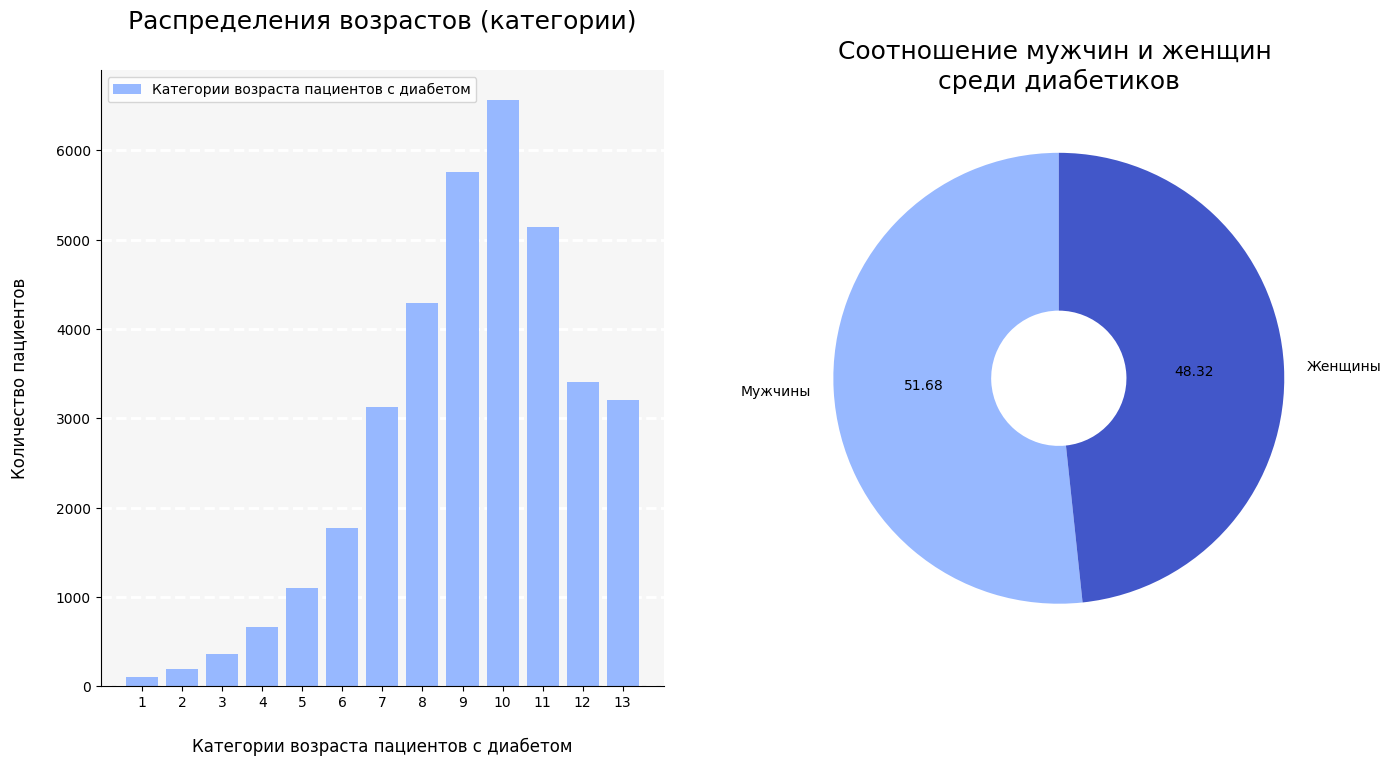

In [ ]:
#Отфильтровываем данные
fig14_1_data = df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1]['Age'].value_counts().sort_index()
fig14_2_data = df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1]['Sex'].value_counts()

#Создаем фигуру и добавляем на первый график сетку
fig14, axis14 = plt.subplots(1, 2, figsize = (16, 8))
plt.subplots_adjust(hspace = .6)
axis14[0].grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
axis14[0].set_facecolor('#F6F6F6')
axis14[0].set_axisbelow(True)

#Отрисовываем первый график, добавляем подписи осей и заголовок
axis14[0].bar(fig14_1_data.index, fig14_1_data.values, color = graph_color,
               label = 'Категории возраста пациентов с диабетом')

axis14[0].set_xlabel('Категории возраста пациентов с диабетом', fontsize = 12,
                     labelpad = 20)
axis14[0].set_ylabel('Количество пациентов', fontsize = 12, labelpad = 20)

axis14[0].set_title('Распределения возрастов (категории)',
                    fontsize = 18, pad = 30)

#Убираем верхнюю и правую границы, настраиваем диапазон значения для оси Х
axis14[0].spines['top'].set_visible(False)
axis14[0].spines['right'].set_visible(False)
axis14[0].set_xticks(np.arange(1, 14, 1))

#Добавляем легенду
axis14[0].legend()

#отрисовываем второй график
axis14[1].pie(fig14_2_data, colors = [graph_color, graph_add_color],
              wedgeprops=dict(width=0.7), startangle = 90,
              labels = ['Мужчины', 'Женщины'], autopct = '%.2f')

#Добавляем заголовок
axis14[1].set_title('Соотношение мужчин и женщин \nсреди диабетиков',
                    fontsize = 18);

**Вывод**

В представленных данных большинство диабетиков среднего и пожилого возраста, мужчин и женщин среди больных диабетом практически равное количество

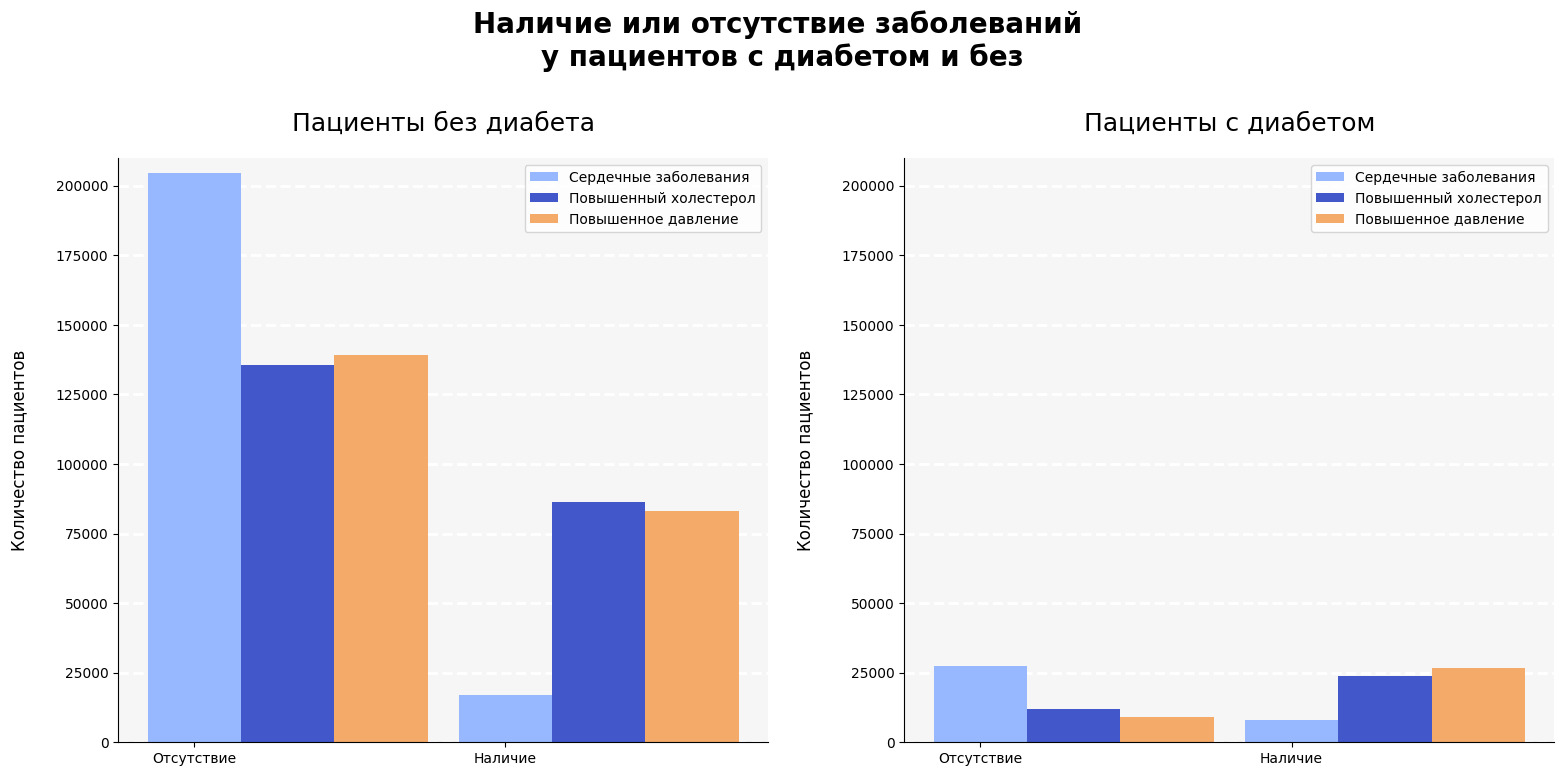

In [ ]:
fig15, axis15 = plt.subplots(1, 2, figsize = (16, 8))

#Сохраняем в словарь для отрисовки графиков
#Ключ - название колонки в датафрейме, значение - список из цвета и описания данных
bar_col = {'HeartDiseaseorAttack': [graph_color, 'Сердечные заболевания'],
           'HighChol': [graph_add_color, 'Повышенный холестерол'],
           'HighBP': [lines_color, 'Повышенное давление']}

#Создаем список с заголовками
axis_titles = ['Пациенты без диабета', 'Пациенты с диабетом']

#Создаем цикл для двух графиков
for ax in range(2):
    #Добавляем на график сетку
    axis15[ax].grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
    axis15[ax].set_facecolor('#F6F6F6')
    axis15[ax].set_axisbelow(True)

    #Указываем толщину столбцов на графике
    bar_width = 0.3

    #Создаем цикл для создания бар-чартов по всем колонкам
    for bar in range(3):
        #Сохраняем в переменную название колонки
        bar_colum = list(bar_col.keys())[bar]
        #Отфильтровываем данные
        fig15_data = df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == ax][bar_colum].value_counts()

        #Отрисовываем график
        axis15[ax].bar(fig15_data.index + bar_width*bar, fig15_data.values, #смещаем столбцы по оси Х на ширину столбца, умноженную на номер цикла
                       color = bar_col[bar_colum][0], width = bar_width, #в переменную цвета передаем 0 индекс списка из значения словаря
                       label = bar_col[bar_colum][1]) #в название передаем 1 индекс списка из значения словаря

    #Добавляем подписи осей
    axis15[ax].set_ylabel('Количество пациентов', fontsize = 12, labelpad = 20)
    axis15[ax].set_title(axis_titles[ax], fontsize = 18, pad = 20)

    #Устанавливаем диапазон значений оси Y, чтобы он совпадал на обоих графиках
    axis15[ax].set_ylim([0, 210000])

    #Убираем правую и верхнюю границы, настраиваем диапазон значений по оси Х и подписываем их
    axis15[ax].spines['top'].set_visible(False)
    axis15[ax].spines['right'].set_visible(False)
    axis15[ax].set_xticks(np.arange(0, 2, 1))
    axis15[ax].set_xticklabels(['Отсутствие', 'Наличие'])

    #Добавляем легенду
    axis15[ax].legend();

#Добавляем единый заголовок
fig15.suptitle('Наличие или отсутствие заболеваний \nу пациентов с диабетом и без',
               fontsize = 20, fontweight = 'semibold') #делаем его дополнительно полужирным
fig15.tight_layout(pad = 2.0); #указываем отступ для него

**Вывод**

В данной выборке в основном представлены пациенты без диабета, который в большинстве не сталкивались с проблемами с сердцем, холестеролом или давлением. Среди пациентов с диабетом наблюдаются проблемы с повышенными холестеролом и давлением, но в основном отсутствуют сердечные заболевания

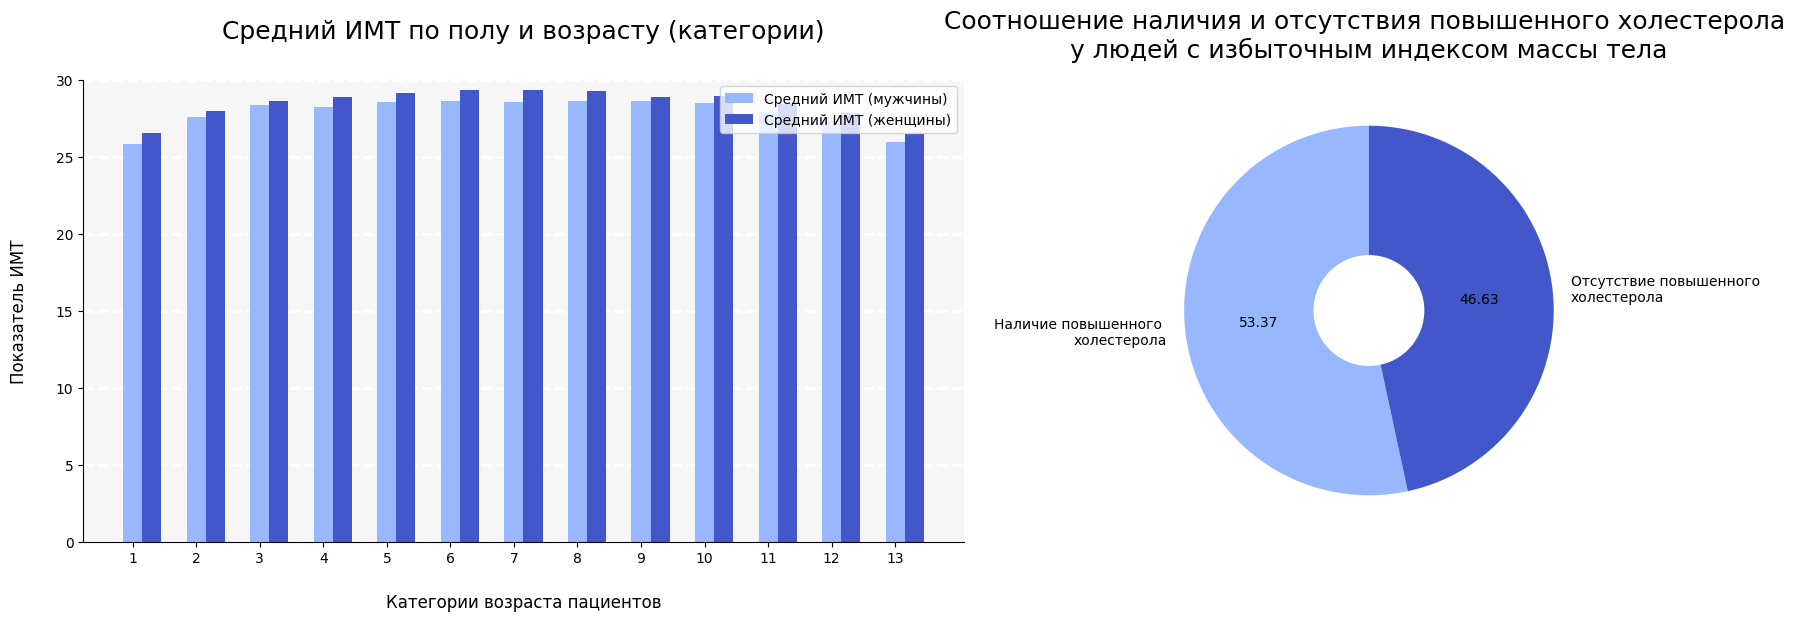

In [ ]:
#Отфильтровываем данные
fig16_1_data = df_diabetes_binary[df_diabetes_binary['Sex'] == 'M'].groupby('Age')['BMI'].mean().sort_index()
fig16_2_data = df_diabetes_binary[df_diabetes_binary['Sex'] == 'F'].groupby('Age')['BMI'].mean().sort_index()
fig16_3_data = df_diabetes_binary[df_diabetes_binary['BMI'] >= 25]['HighChol'].value_counts()

#Создаем фигуру, указываем расстояние между графиками, добавляем на первый сетку
fig16, axis16 = plt.subplots(1, 2, figsize = (20, 6), gridspec_kw={'width_ratios': [2.5, 1.5]}) #указываем сколько относительно всей длины фигуры будет занимать каждый график
plt.subplots_adjust(hspace = .6)
axis16[0].grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
axis16[0].set_facecolor('#F6F6F6')
axis16[0].set_axisbelow(True)

#Указываем толщину столбца
bar_width = 0.3

#Отрисовываем графики
axis16[0].bar(fig16_1_data.index, fig16_1_data.values, color = graph_color,
              width = bar_width, label = 'Средний ИМТ (мужчины)')
axis16[0].bar(fig16_2_data.index + bar_width, fig16_2_data.values,
              color = graph_add_color, width = bar_width,
              label = 'Средний ИМТ (женщины)')

#Подписываем оси и заголовок
axis16[0].set_xlabel('Категории возраста пациентов', fontsize = 12,
                     labelpad = 20)
axis16[0].set_ylabel('Показатель ИМТ', fontsize = 12, labelpad = 20)

axis16[0].set_title('Средний ИМТ по полу и возрасту (категории)',
                    fontsize = 18, pad = 30)

#Убираем верхнюю и правую границы, указываем диапазоны значений по осям
axis16[0].spines['top'].set_visible(False)
axis16[0].spines['right'].set_visible(False)
axis16[0].set_xticks(np.arange(1, 14, 1))
axis16[0].set_ylim([0, 30])

#Добавляем легенду
axis16[0].legend()

#Отрисовываем второй график
axis16[1].pie(fig16_3_data, colors = [graph_color, graph_add_color],
              wedgeprops=dict(width=0.7), startangle = 90,
              labels = ['Наличие повышенного \nхолестерола', 'Отсутствие повышенного \nхолестерола'],
              autopct = '%.2f')
#Добавляем заголовок
axis16[1].set_title('Соотношение наличия и отсутствия повышенного холестерола \nу людей с избыточным индексом массы тела',
                    fontsize = 18, pad = 16);

**Вывод**

Во всех представленных возрастных категориях средний ИМТ выше нормы, но самый высокий показатель встречается среди пациентов среднего и пожилого возраста. Средний ИМТ у женщин во всех категориях возрастов выше, чем у мужчин.

Люди с избыточной массой тела в чуть большей степени имеют проблемы с холестеролом, но в представленных данных это соотношение близко к равному.